<a href="https://colab.research.google.com/github/bridgetmanu/K-NN/blob/main/Mini_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mini Project #1
Name: Bridget Manu

In [19]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import random



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
train = pd.read_csv('/content/drive/MyDrive/1-training_data.csv')
train.head()
test = pd.read_csv('/content/drive/MyDrive/1-test_data.csv')
test.head()

,x.1,x.2,y
0,0.409620,-0.360190,yes
1,0.329649,-0.181209,yes
2,-0.134796,0.455620,yes
3,0.943727,-1.215757,yes
4,0.535747,0.269788,yes


In [12]:
# Prepare training data
train_X = train[['x.1', 'x.2']].values
train_y = train['y'].values

# Prepare testing data
test_X = test[['x.1', 'x.2']].values
print(test_X[:5, :]) # displays first 5 values in all columns
test_y = test['y'].values
print(test_y[:5]) # displays first 5 values

[[ 0.40962046 -0.36019017]
 [ 0.32964884 -0.1812087 ]
 [-0.13479635  0.45561953]
 [ 0.94372674 -1.21575667]
 [ 0.53574722  0.26978767]]
['yes' 'yes' 'yes' 'yes' 'yes']


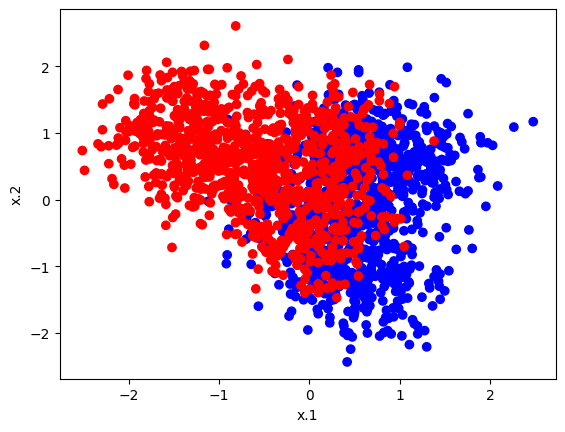

In [14]:
# Plot the training data
plt.scatter(train_X[:, 0], train_X[:, 1], c=np.where(train_y == 'yes', 'blue', 'red'))
plt.xlabel('x.1')
plt.ylabel('x.2')
plt.show()

In [15]:
# KNN with k=1
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(train_X, train_y)

# Predictions on training data
train_pred = knn.predict(train_X)
print("Training Error Rate:", 1 - accuracy_score(train_y, train_pred))

# Predictions on test data
test_pred = knn.predict(test_X)
print("Test Error Rate:", 1 - accuracy_score(test_y, test_pred))

# Confusion Matrix for Test Data
print(pd.crosstab(test_pred, test_y, rownames=['Predicted'], colnames=['Actual']))

Training Error Rate: 0.0
Test Error Rate: 0.23950000000000005
Actual      no  yes
Predicted          
no         740  219
yes        260  781


In [25]:
ks = list(range(1, 100))
train_error_rates = []
test_error_rates = []

for k in ks:
    # Create and fit the KNN model
    random.seed(1)
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_X, train_y)

    train_pred = knn.predict(train_X)
    test_pred = knn.predict(test_X)

    train_error_rates.append(1 - accuracy_score(train_y, train_pred))
    test_error_rates.append(1 - accuracy_score(test_y, test_pred))

# Plot the error rates
plt.plot([1/k for k in ks], train_error_rates, label='Training Error Rate', color='red', marker='o')
plt.plot([1/k for k in ks], test_error_rates, label='Test Error Rate', color='blue', marker='o')
plt.xlabel('Number of Nearest Neighbors')
plt.ylabel('Error Rate')
plt.legend()
plt.show()

# Best k based on the minimum test error rate
optimal_k = ks[np.argmin(test_error_rates)]
optimal_k_test = test_error_rates[np.argmin(ks==optimal_k)]
optimal_k_train = train_error_rates[np.argmin(ks==optimal_k)]
print(f'Optimal k: {optimal_k}')
print(f'train error rate for Optimal k: {optimal_k_train}')
print(f'test error rate for Optimal k : {optimal_k_test}')


Optimal k: 64
train error rate for Optimal k: 0.0
test error rate for Optimal k : 0.23950000000000005


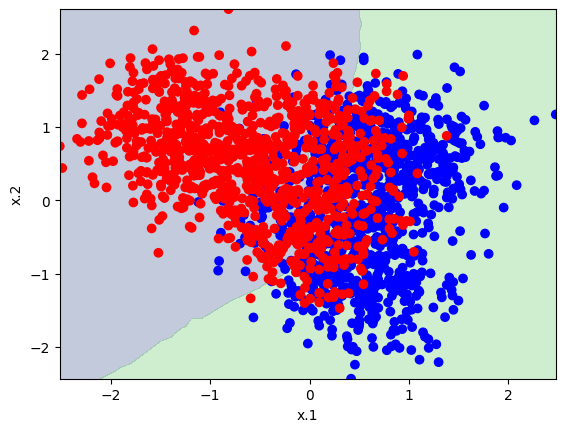

In [23]:
# Create a grid for plotting the decision boundary
x1_grid = np.linspace(train_X[:, 0].min(), train_X[:, 0].max(), 50)
x2_grid = np.linspace(train_X[:, 1].min(), train_X[:, 1].max(), 50)
xx, yy = np.meshgrid(x1_grid, x2_grid)
grid = np.c_[xx.ravel(), yy.ravel()]

# Fit KNN with the optimal k
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(train_X, train_y)
grid_pred = knn.predict(grid)
probabilities = knn.predict_proba(grid)[:, 1].reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, probabilities, levels=[0, 0.5, 1], alpha=0.3)
plt.scatter(train_X[:, 0], train_X[:, 1], c=np.where(train_y == 'yes', 'blue', 'red'))
plt.xlabel('x.1')
plt.ylabel('x.2')
plt.show()